# 회귀(Regression) 분석

## kNN 모델을 이용한 회귀 분석

- kNN은 분류(Classification) 뿐만 아니라 회귀(Regression) 분석에도 사용 가능
- 가까운 점들로부터 예측한 값의 평균을 구하는 방식
- 단순 평균을 구하기도 하고(uniform), 거리에 비례한 가중치 평균을 구하기도 함(distance-weights)

In [1]:
%matplotlib inline
import mglearn
from mglearn import *

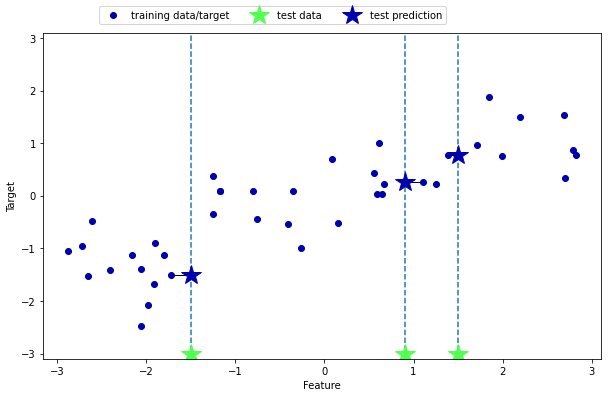

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)    #개념도

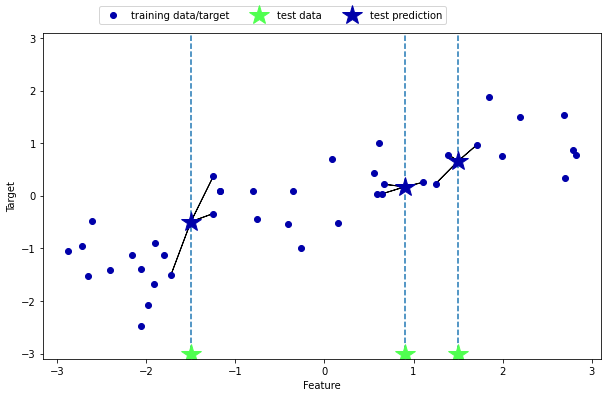

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 여러 개의 최근접 이웃을 사용할 때는 이웃간의 평균을 예측 값으로 활용

- Classifier가 아니라 Regressor 함수를 제공함
- 사용 방법은 거의 동일하지만 분류의 목적이 아니라 회귀 값을 찾는 게 목적

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

from sklearn.model_selection import train_test_split
# wave 데이터 셋을 훈련 세트와 테스트 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 이용하여 모델을 학습 시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)       # Ctrl+shif+ '-(마이너스)' 누르면 창 분할
X, y

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547],
        [-2.87649303],
        [ 2.81945911],
        [ 1.99465584],
        [-1.72596534],
        [-1.9090502 ],
        [-1.89957294],
        [-1.17454654],
        [ 0.14853859],
        [-0.40832989],
        [-1.25262516],
        [ 0.67111737],
        [-2.16303684],
        [-1.24713211],
        [-0.80182894],
        [-0.26358009],
        [ 1.71105577],
        [-1.80195731],
        [ 0.08540663],
        [ 0.55448741],
        [-2.72129752],
        [ 0.64526911],
        [-1.97685526],
        [-2.60969044],
        [ 2.69331322],
        [ 2.7937922 ],
        [ 1.85038409],
        [-1.17231738],
        [-2.41396732],
        [ 1.10539816],
        [-0.35908504]]),
 array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
     

In [6]:
from sklearn.model_selection import train_test_split
# wave 데이터 셋을 훈련 세트와 테스트 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 이용하여 모델을 학습 시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print("테스트 세트 예측 결과:\n{}".format(reg.predict(X_test)))

테스트 세트 예측 결과:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [8]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

In [9]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### for 문 이용해 가장 예측력 높은 이웃 수(k) 결정하기

In [10]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []  # 빈 리스트를 만듦
test_accuracy = []

neighbors_settings = range(1, 20)   # 이웃의 수를 반복해서 어떤 값이 가장 좋을 지를 결정하기 위해 for문으로 반복
for n_neighbors in neighbors_settings:
    # 모델 생성
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))  # 훈련 세트 정확도를 저장
    
    test_accuracy.append(reg.score(X_test, y_test))  # 일반화 정확도 저장
    
    print(n_neighbors, reg.score(X_train, y_train))
    print(n_neighbors, reg.score(X_test, y_test))
    
    
    # test 결과 3일때가 일반화 정확도가 가장 높은 편?

1 1.0
1 0.3519867415115093
2 0.8489295178013407
2 0.6557491875542132
3 0.8194343929538755
3 0.8344172446249605
4 0.8168007715187524
4 0.7704189018456431
5 0.7933627228318063
5 0.707138114401173
6 0.787190229198686
6 0.6963552119009186
7 0.787192898001129
7 0.6752134587675717
8 0.7541918525127793
8 0.6788241385739406
9 0.7283986168755594
9 0.6541236379533191
10 0.7210974727340191
10 0.6381920637966467
11 0.6972434174127736
11 0.6989374099426371
12 0.6682666461724392
12 0.6853827358907443
13 0.6313956123358728
13 0.6911059364120702
14 0.6159358374946479
14 0.6838927115096367
15 0.5890286148302105
15 0.7056253886346188
16 0.5906944580263527
16 0.7055036077606035
17 0.5539135255958023
17 0.6820756456432953
18 0.5371162326771741
18 0.6602566052151162
19 0.5255353931675315
19 0.6549724049644473


In [11]:
print("테스트 세트 예측 결과:\n{}".format(reg.predict(X_test)))

테스트 세트 예측 결과:
[-0.769438    0.35588615  0.43254829 -0.769438   -0.769438   -0.769438
  0.35588615  0.43254829 -0.45045453 -0.769438  ]


In [12]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

In [13]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.65


### Score() 값

- 일반 분류에서는 score가 정확도를 계산했지만, 회귀 분석에서는 R^2 값을 리턴함
- 0 < R^2 < 1
- 1의 값은 예측이 완벽하게 맞는 경우, 0은 그 반대의 경우를 말함

- k=1, 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 매우 큼, 매우 불안정한 예측 결과
- 이웃의 수가 늘어날수록 예측은 안정적으로 변화(일반화에 가까워짐)
- kNN 모델은 이해가 쉽고 구현도 쉬운 편이나 데이터 양이 많아지면 분석이 매우 느려짐, 특성 수가 많을 때도 마찬가지임
- 현실에서 회귀분석에 kNN은 많이 사용하지는 않음
- 회귀는 선형 회귀(Linear regression)가 주로 사용되며 특성이 많을 수록 선형 예측이 효과적임

## 선형 회귀(Linear regression) 모델

- 가장 간단하고 오래된 회귀용 선형 알고리즘
- 개체의 특성들을 종합적으로 고려하는 전형적인 예측 모델
- 선형회귀 모델: 각 특성별로 가중치를 부여하고 그들을 모두 다 더하는 방식
- e.g. (결혼정보회사) 고객의 특성(가족사항, 신체 치수, 거주지, 직업, 학력 등)에 따른 이성 선호도 점수
- 이성 선호도(점수) = 12.145 + (0.0023 X 거주지) + (0.035 X 학력) - (0.00017 X 형제자매수)
- y = ax1 + bx2 - cx3 + d

In [16]:
%matplotlib inline
from mglearn import *

from IPython.display import Image

Image(url='https://image.slidesharecdn.com/2-170725041219/95/2supervised-learning-27-638.jpg?cb=1500972558')

In [17]:
%matplotlib inline
from mglearn import *

w[0]: 0.393906  b: -0.031804


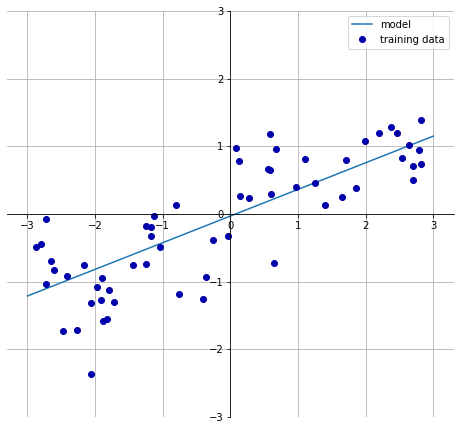

In [18]:
mglearn.plots.plot_linear_regression_wave()    #샘플 데이터 불러와서 회귀선 보기, 기울기와 절편 확인

- 직선형 모델이 많은 정보를 잃는 것처럼 보이지만 특성 수가 많아지면 충분히 잘 작동함
- 선형회귀는 MSE(Mean Square Error)를 최소화하는 것을 목표로 함

In [1]:
print("계수: {}".format(lr.coef_))
print("절편: {}".format(lr.intercept_))

NameError: name 'lr' is not defined

In [23]:
import mglearn
import sklearn

(506, 13)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

(379, 104)

(127, 104)

- 이 경우, 특성이 너무 많아 가중치가 풍부해져 과대적합이 됨
- 데이터를 더 많이 확보하거나 모델을 규제

## 릿지 회귀(Ridge regression)

- 일반적인 선형회귀에 추가로 제약을 가함
- 가중치의 절대값을 가능한 작게 제한, 즉 전체적으로 계수의 크기가 작도록 만듦
- 모든 계수들을 골고루 반영되도록 만드는 효과
- L2 규제라고 함, 계수들의 자승의 합을 줄이는 방법, 여러 변수가 골고루 반영되기를 원하는 방향으로 일반화함
- L2 Norm의 제곱을 패널티로 사용(알파 계수)
- 알파 값이 클수록 제약이 커져 계수의 값은 작아짐
- e.g. 특정과목만 잘하는 학생은 싫다,자승의 합을 최소화, 알파 값을 높여 가중치를 0에 가깝게 만들어 오차가 큰 특성의 영향을 줄임

## c.f. 라쏘  회귀(Lasso regression)

- L1 규제: 계수들의 절대치의 합을 줄이는 방법
- 오차가 큰 변수와 작은 변수를 동일시해 동등하게 줄이므로 약한 특성은 먼저 사라짐
- 가중치의 개수를 줄이는 효과
- 특성 수는 많지만 그중 일부가 중요하다고 판단될 때 사용하면 효과적

In [33]:
from sklearn.linear_model import Ridge       #default로 alpha=1

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test))) 

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 릿지 모델을 사용한 결과, (가중치가 규제되어) 과대적합이 줄고 테스트 점수가 높아짐
- 규제화를 하는 정도를 알파 값을 바꾸어 가면서 여러 가지로 확인해 볼 수 있음
- 규제를 많이 할수록 일반화는 유리해지지만 성능이 낮아지는 단점이 공존
- 알파를 10, 0.1 등으로 바꾸어 보면?

In [34]:
ridge = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test))) 

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


- 제약이 높아져 과대 적합을 보임

In [35]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]

In [36]:
for al in alpha_list:
    ridge10 = Ridge(al).fit(X_train, y_train)
    
    print("알파 = ", al)
    print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test))) 

알파 =  0.0001
훈련 세트 점수: 0.95
테스트 세트 점수: 0.62
알파 =  0.001
훈련 세트 점수: 0.95
테스트 세트 점수: 0.63
알파 =  0.005
훈련 세트 점수: 0.95
테스트 세트 점수: 0.67
알파 =  0.01
훈련 세트 점수: 0.94
테스트 세트 점수: 0.70
알파 =  0.05
훈련 세트 점수: 0.93
테스트 세트 점수: 0.76
알파 =  0.1
훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
알파 =  1
훈련 세트 점수: 0.89
테스트 세트 점수: 0.75
알파 =  10
훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
알파 =  100
훈련 세트 점수: 0.60
테스트 세트 점수: 0.42


In [37]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test))) 

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


## 라소 규제 적용

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001).fit(X_train, y_train)     # 기본값: alpha = 1.0, max_iter=1000

print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test))) 

훈련 세트 점수: 0.94
테스트 세트 점수: 0.75


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.8635616562358, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [39]:
import numpy as np

In [40]:
print(np.sum(lasso.coef_ !=0))    # 과소적합의 가능성이 높아보임, 0이 아닌 계수의 개수는? 104개 중에서??

76
